In [75]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dropout, Dense
import pandas as pd
import numpy as np

In [77]:
train_data = pd.read_csv('mnist_train.csv')

In [78]:
test_data = pd.read_csv('mnist_test.csv')

In [79]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
x_train = train_data.drop(['label'], axis=1).values

In [81]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
y_train = train_data['label'].values

In [83]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [84]:
x_train = x_train.reshape(x_train.shape[0], 28,28, 1)

In [85]:
x_train.shape

(60000, 28, 28, 1)

In [86]:
y_train.shape

(60000,)

In [87]:
model = keras.Sequential()

In [88]:
from keras.layers import Conv2D

In [89]:
model.add(Conv2D(64, (3, 3), 1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

C:\Users\Saif\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.add(Flatten())

In [91]:
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [92]:
import numpy as np

In [93]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [94]:
from keras.utils import to_categorical

In [95]:
y_train = to_categorical(y_train, 10)

In [96]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,018 (277.41 KB)

 Trainable params: 71,018 (277.41 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [100]:
history = model.fit(x_train, y_train, batch_size=512, validation_split=0.2, epochs=10)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - accuracy: 0.8795 - loss: 0.4071 - val_accuracy: 0.9547 - val_loss: 0.1590
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.9271 - loss: 0.2480 - val_accuracy: 0.9666 - val_loss: 0.1111
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.9435 - loss: 0.1856 - val_accuracy: 0.9743 - val_loss: 0.0890
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.9571 - loss: 0.1444 - val_accuracy: 0.9777 - val_loss: 0.0747
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.9634 - loss: 0.1229 - val_accuracy: 0.9809 - val_loss: 0.0664
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.9681 - loss: 0.1054 - val_accuracy: 0.9824 - val_loss: 0.0613
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.9687 - loss: 0.1004 - val_accuracy: 0.9823 - val_loss: 0.0573
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.9740 - loss: 0.0848 - val_accu

In [102]:
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
x_test = test_data.drop(['label'], axis=1).values

In [106]:
y_test = test_data['label']

In [108]:
y_test

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [110]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [120]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_test.shape)

(10000, 28, 28, 1)


In [124]:
y_test = to_categorical(y_test, 10)

In [126]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9833 - loss: 0.0528


In [128]:
test_acc

0.9866999983787537

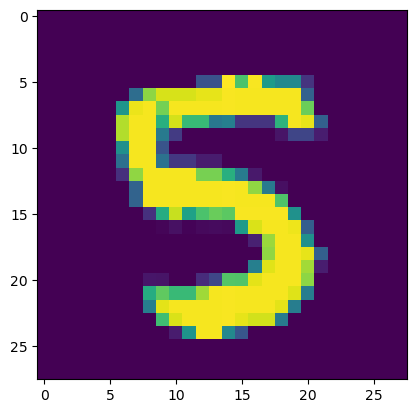

In [144]:
n = 120
plt.imshow(x_test[n])

In [146]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [147]:
print(np.argmax(pred[n]))

5
